# Convolutional Neural Network

In [1]:
import numpy as np

from tensorflow.keras import layers, models, optimizers, utils, datasets
from notebooks.utils import display

2023-06-05 11:37:17.147384: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-05 11:37:17.269785: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Customize Setup

In [2]:
! pip install --no-index -f https://github.com/dreoporto/ptmlib/releases ptmlib

from ptmlib.time import Stopwatch, AlertSounds
import ptmlib.model_tools as modt
import ptmlib.charts as pch

Looking in links: https://github.com/dreoporto/ptmlib/releases


In [3]:
main_stopwatch = Stopwatch()
main_stopwatch.start()

Start Time: Mon Jun  5 11:37:20 2023


## 0. Parameters

In [4]:
NUM_CLASSES = 10

## 1. Prepare the Data

In [5]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [6]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [7]:
y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

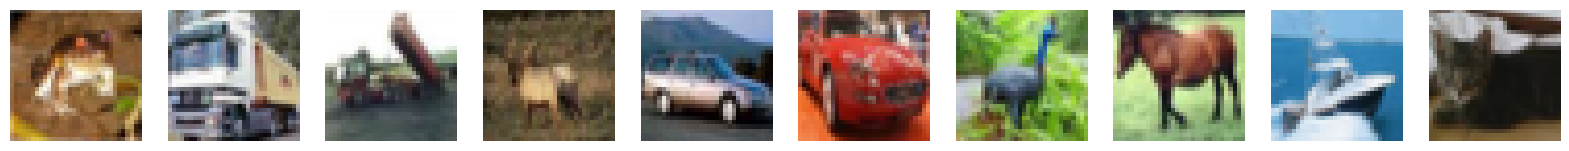

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [8]:
display(x_train[:10])
print(y_train[:10])

## 2. Build the model

In [9]:
input_layer = layers.Input((32, 32, 3))

x = layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='same')(input_layer)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters=32, kernel_size=3, strides=2, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters=64, kernel_size=3, strides=1, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters=64, kernel_size=3, strides=2, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Flatten()(x)

x = layers.Dense(128)(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
x = layers.Dropout(rate=0.5)(x)

x = layers.Dense(NUM_CLASSES)(x)
output_layer = layers.Activation('softmax')(x)

model = models.Model(input_layer, output_layer)

2023-06-05 11:37:21.003460: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-05 11:37:21.005484: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-05 11:37:21.005682: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-05 11:37:21.006189: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                             

## 3. Train the model

In [11]:
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [12]:
stopwatch = Stopwatch()
stopwatch.start()

history = model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=10,
    shuffle=True,
    validation_data=(x_test, y_test)
)

stopwatch.stop()

Start Time: Mon Jun  5 11:37:22 2023
Epoch 1/10


2023-06-05 11:37:22.572581: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.
2023-06-05 11:37:22.836492: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.
2023-06-05 11:37:23.955477: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100


1563/1563 [==============================] - 24s 14ms/step - loss: 1.5449 - accuracy: 0.4630 - val_loss: 1.3032 - val_accuracy: 0.5326
Epoch 2/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.1378 - accuracy: 0.5984 - val_loss: 1.0860 - val_accuracy: 0.6112
Epoch 3/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.0000 - accuracy: 0.6500 - val_loss: 1.1611 - val_accuracy: 0.6052
Epoch 4/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9160 - accuracy: 0.6790 - val_loss: 0.8818 - val_accuracy: 0.6830
Epoch 5/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8556 - accuracy: 0.7025 - val_loss: 1.0847 - val_accuracy: 0.6255
Epoch 6/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8086 - accuracy: 0.7177 - val_loss: 0.8160 - val_accuracy: 0.7154
Epoch 7/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7603 - accuracy: 0.7332 - val_loss: 0.9324 - val_accura

Saved image: accuracy-20230605-114107.png


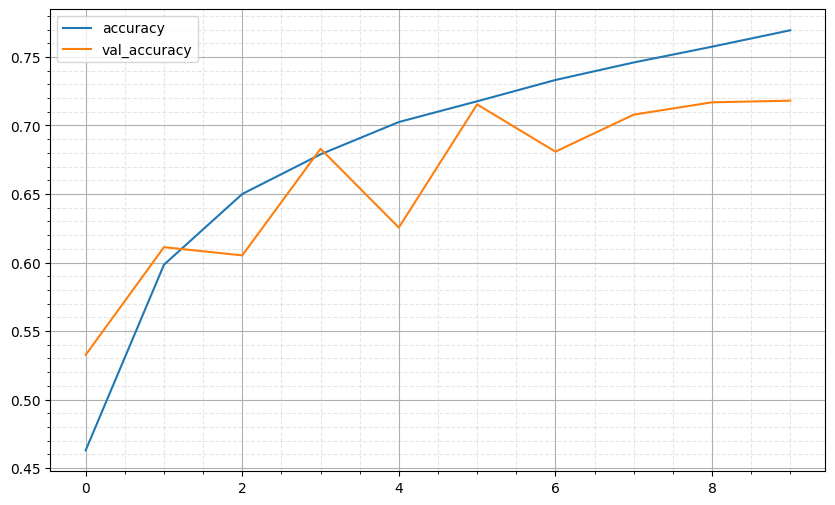

Saved image: loss-20230605-114107.png


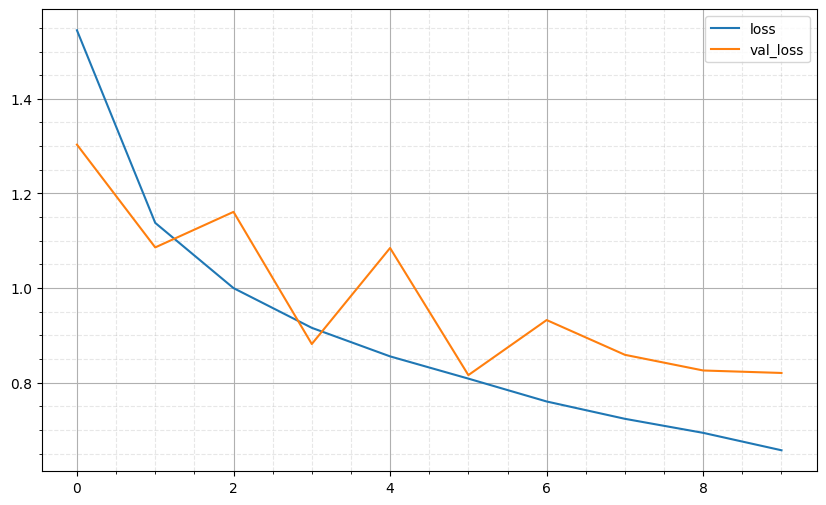

In [13]:
pch.show_history_chart(history, "accuracy", save_fig_enabled=True)
pch.show_history_chart(history, "loss", save_fig_enabled=True)

## 4. Evaluation

In [14]:
model.evaluate(x_test, y_test, batch_size=1000)

10/10 [==============================] - 1s 18ms/step - loss: 0.8206 - accuracy: 0.7181


[0.8205955028533936, 0.7181000113487244]

In [15]:
CLASSES = np.array(
    [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
)

In [16]:
preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

313/313 [==============================] - 1s 3ms/step


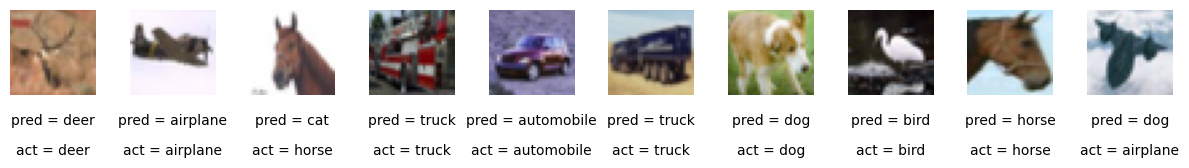

In [17]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "pred = " + str(preds_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "act = " + str(actual_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(img)

In [18]:
# ALL DONE!

main_stopwatch.stop(sound_path=AlertSounds.DORE)

End Time:   Mon Jun  5 11:41:10 2023
Elapsed seconds: 230.5457 (3.84 minutes)
